In [4]:
# KNN classifier applied to 2d dataset with 3 classes

import superimport

import numpy as np
import matplotlib.pyplot as plt



from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score


from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntrain:]
y_test = y[ntrain:]
                  


In [5]:
x_train.shape


(100, 2)

In [6]:
y_train.shape

(100,)

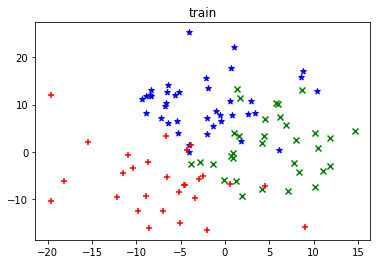

In [9]:
plt.figure()
y_unique = np.unique(y_train)
markers = '*x+'
colors = 'bgr'
for i in range(len(y_unique)):
  plt.scatter(x_train[y_train == y_unique[i], 0],
             x_train[y_train == y_unique[i], 1],
             marker=markers[i],
             c=colors[i])
plt.title('train')
plt.show()


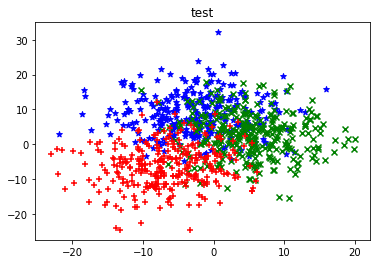

In [10]:

plt.figure()
for i in range(len(y_unique)):
  plt.scatter(x_test[y_test == y_unique[i], 0],
             x_test[y_test == y_unique[i], 1],
             marker=markers[i],
             c=colors[i])
plt.title('test')
plt.show()



In [11]:
x = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 200)
y = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 200)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]



<ipython-input-12-93bbc66c994b>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap='jet', alpha=0.2)


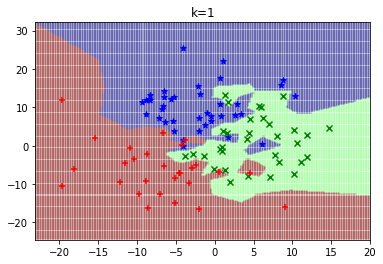

<ipython-input-12-93bbc66c994b>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap='jet', alpha=0.2)


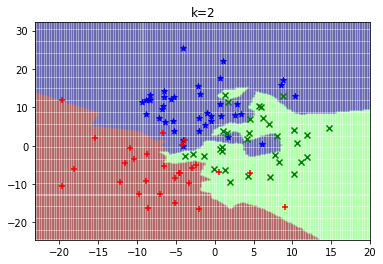

<ipython-input-12-93bbc66c994b>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap='jet', alpha=0.2)


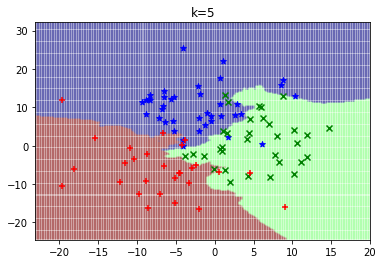

In [12]:
# use the knn model to predict
for k in [1, 2, 5]:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  plt.figure()
  y_predicted = knn.predict(xy)
  #plt.pcolormesh(y_predicted.reshape(200, 200), cmap='jet')
  plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap='jet', alpha=0.2)
  for i in range(len(y_unique)):
      plt.scatter(x_train[y_train == y_unique[i], 0],
                 x_train[y_train == y_unique[i], 1],
                 marker=markers[i],
                 c=colors[i])
  plt.title('k=%s' % (k))
  plt.show()



NameError: name 'pml' is not defined

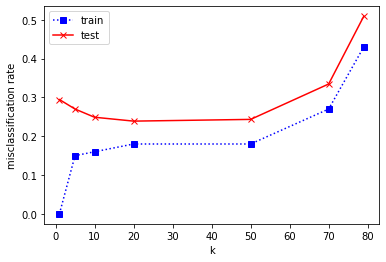

In [8]:
#plot train err and test err with different k
#ks = [int(n) for n in np.linspace(1, ntrain, 10)]
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_errs.append(1 - knn.score(x_train, y_train))
  test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')
pml.savefig('knnClassifyErrVsK.pdf')
plt.show()



Text(0.5, 1.0, '5-fold cross validation, n-train = 200')

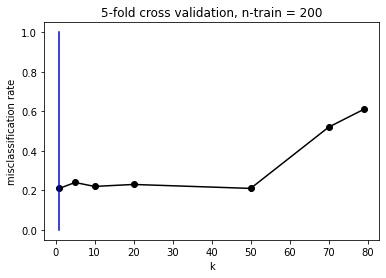

In [9]:
#cross_validate
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, 'ko-')
min_k = ks[np.argmin(scores)]
plt.plot([min_k, min_k], [0, 1.0], 'b-')
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation, n-train = 200')



NameError: name 'pml' is not defined

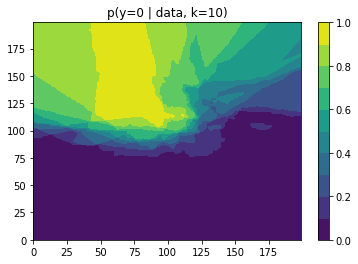

In [10]:
#draw hot-map to show the probability of different class
knn = KNN(n_neighbors=10)
knn.fit(x_train, y_train)
xy_predic = knn.predict_proba(xy)
levels = np.arange(0, 1.01, 0.1)
for i in range(3):
    plt.figure()
    plt.contourf(xy_predic[:, i].ravel().reshape(200, 200), levels)
    plt.colorbar()
    plt.title('p(y=%s | data, k=10)' % (i))
    pml.savefig('knnClassifyDemo_hotmap_%s.png' % (i))
plt.show()
